# Avocado Project

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
    
•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

The project here described involves working with a dataset containing retail scan data for Hass avocados. Here data have several columns of information, including date, average price, type (conventional or organic), year, region, total volume, and the quantity of avocados

The project has two main tasks:
    
    Classification Task:

Objective: To predict the region (city or area) where avocados are sold based on the given data.
    
    Regression Task:

Objective: To predict the average price of avocados based on the provided features.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df=pd.read_csv('avacado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis

In [4]:
# Drop the 'Unnamed: 0' column
if 'Unnamed: 0' in df:
    df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.shape

(18249, 13)

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
# Check for missing values
print(df.isnull().sum())


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [10]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

9 Float datatype:AveragePrice,Total Volume, 4046,4225,4770,Total Bags ,Small Bags,Large Bags,XLarge Bags   
    
1 integer datatype:year
    
3 Object datatype: Date, type,region   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


No Null value is present
Nine Float datatype:AveragePrice,Total Volume, 4046,4225,4770,Total Bags ,Small Bags,Large Bags,XLarge Bags

one integer datatype:year

three Object datatype: Date, type,region

Here AveragePrice is target column

separate date and month

In [12]:
 #Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Here new column added (Month and Day)

remove date column

In [14]:
df = df.drop('Date', axis=1)

# Display the DataFrame after removing the 'Date' column
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
average_price_yearwise = df.groupby('year')['AveragePrice'].mean().reset_index()

# Display the result
print(average_price_yearwise)


   year  AveragePrice
0  2015      1.375590
1  2016      1.338640
2  2017      1.515128
3  2018      1.347531


In [16]:
avocado_sold_by_type = df.groupby(['year', 'type'])['Total Volume'].sum().reset_index()

# Display the result
print(avocado_sold_by_type)


   year          type  Total Volume
0  2015  conventional  4.296599e+09
1  2015       organic  8.886943e+07
2  2016  conventional  4.690250e+09
3  2016       organic  1.306401e+08
4  2017  conventional  4.766166e+09
5  2017       organic  1.681399e+08
6  2018  conventional  1.334206e+09
7  2018       organic  4.853227e+07


.Tn 2015, there were approximately 4.30 billion units of 'conventional' avocados sold and about 88.87 million units of 'organic' avocados sold.

.In 2016, there were approximately 4.69 billion units of 'conventional' avocados sold and about 130.64 million units of 'organic' avocados sold.

.In 2017, there were approximately 4.77 billion units of 'conventional' avocados sold and about 168.14 million units of 'organic' avocados sold.

.In 2018, there were approximately 1.33 billion units of 'conventional' avocados sold and about 48.53 million units of 'organic' avocados sold.

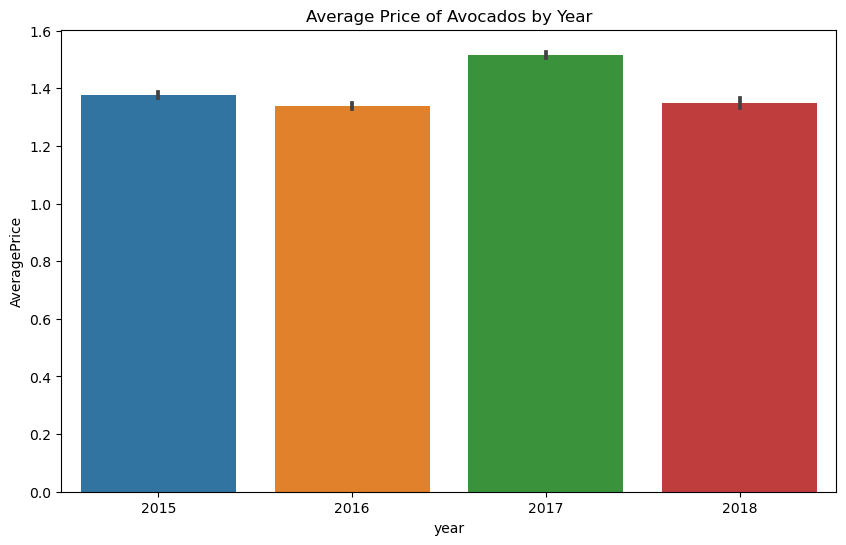

In [17]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='year',y='AveragePrice', data=df)
plt.title('Average Price of Avocados by Year')
plt.show()

From above graph, we can get the following conclusions:
In the year 2017 the price of the Avacado was highest.
In the year 2015 the price was second highest.
In the 2016 the price of the Avacado was lowest.

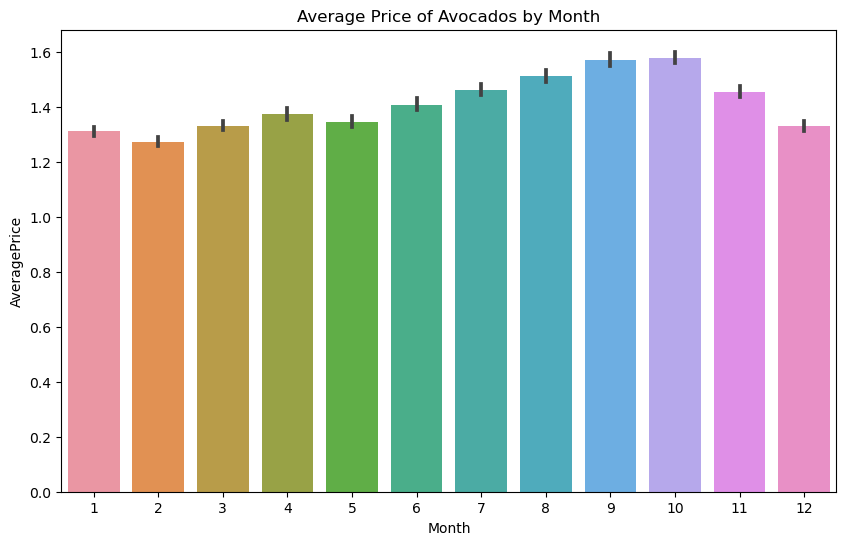

In [18]:
 

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month',y='AveragePrice', data=df)
plt.title('Average Price of Avocados by Month')


plt.show()

From above graph, we can say that:
September and October month have the maximum prices. This may be due to high demand in the month of September and October.
From the above graph, the trend of pricing is almost same. This shows that the fruit Avocado is in demand always.

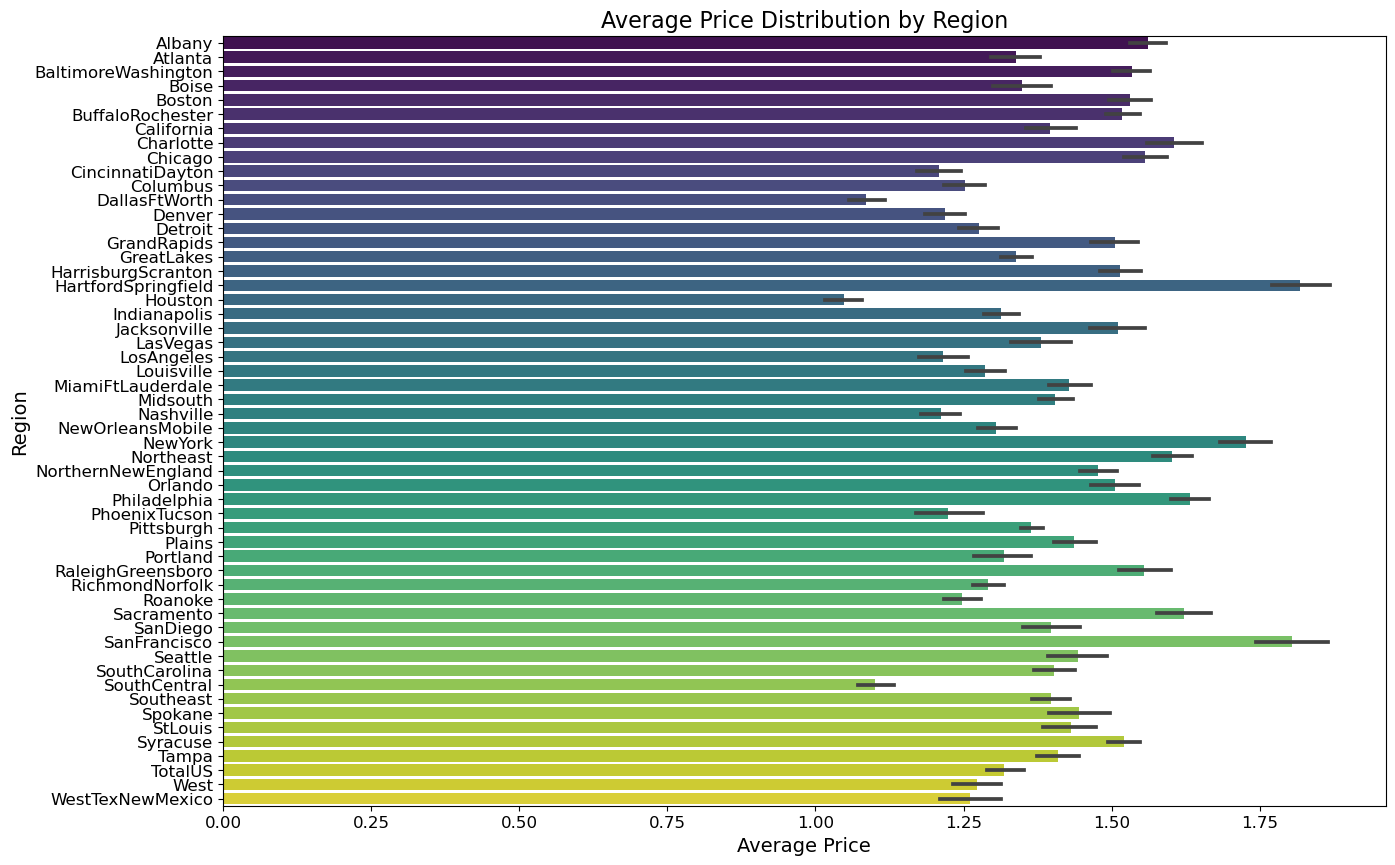

In [19]:
#Average Price distribution region-wise
plt.figure(figsize=(15,10))
sns.barplot(x='AveragePrice', y='region', data=df, orient='h', palette='viridis')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Average Price Distribution by Region', fontsize=16)
plt.show()

From the above graph we can say that the average price of Avocado is highest from the region 'Hartford–Springfield'.
It is lowest in the region 'Houston'.

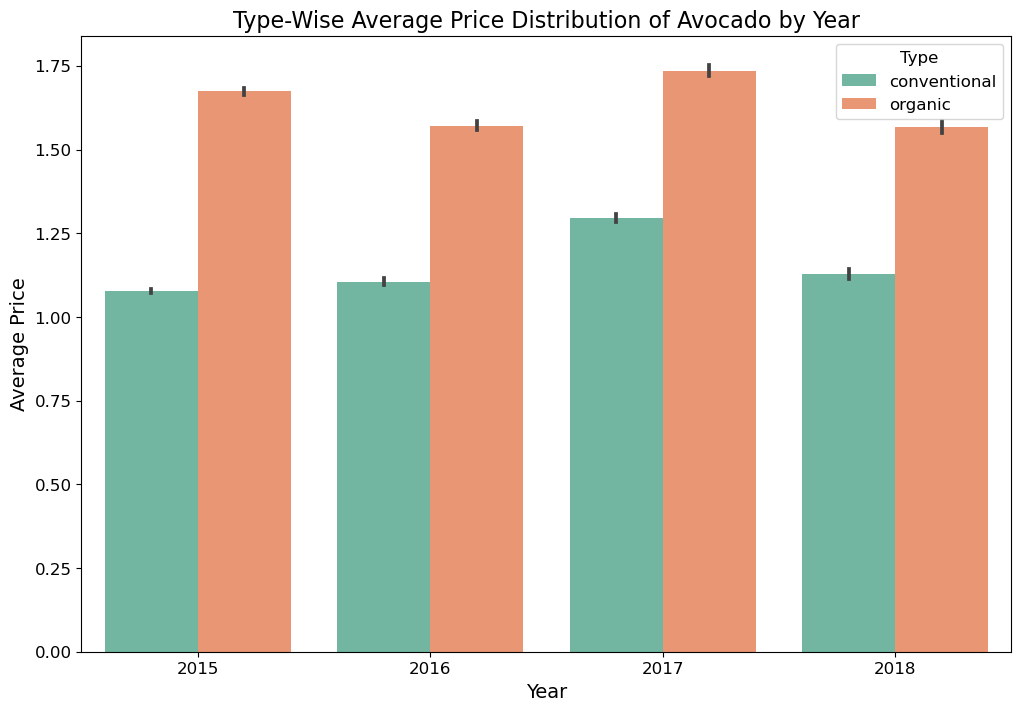

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='AveragePrice', hue='type', data=df, palette='Set2')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Type-Wise Average Price Distribution of Avocado by Year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', title_fontsize=12, fontsize=12)
plt.show()

We can see that the price of organic Avocado is higher than convetional type Avocado.

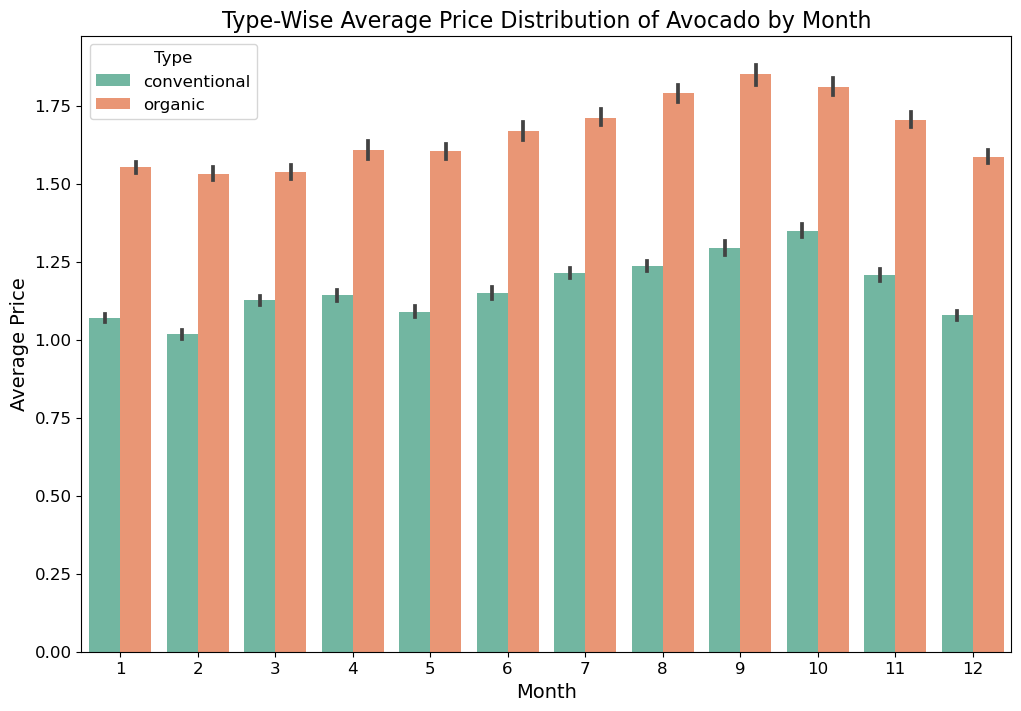

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='AveragePrice', hue='type', data=df, palette='Set2')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Type-Wise Average Price Distribution of Avocado by Month', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', title_fontsize=12, fontsize=12)
plt.show()

The above grapgh shows that there is continuous increase in the average price of the Avocado from the May month for both the types.
For organic avacado the peak value of the average price is attended in the month of September and for the conventional type it is in the month of October.
The average price is continuously increasing after the May month till October month for the convetional type Avocado.
The average price is continuously increasing after the May month till September month for the organic type Avocado.

In [22]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# correlation

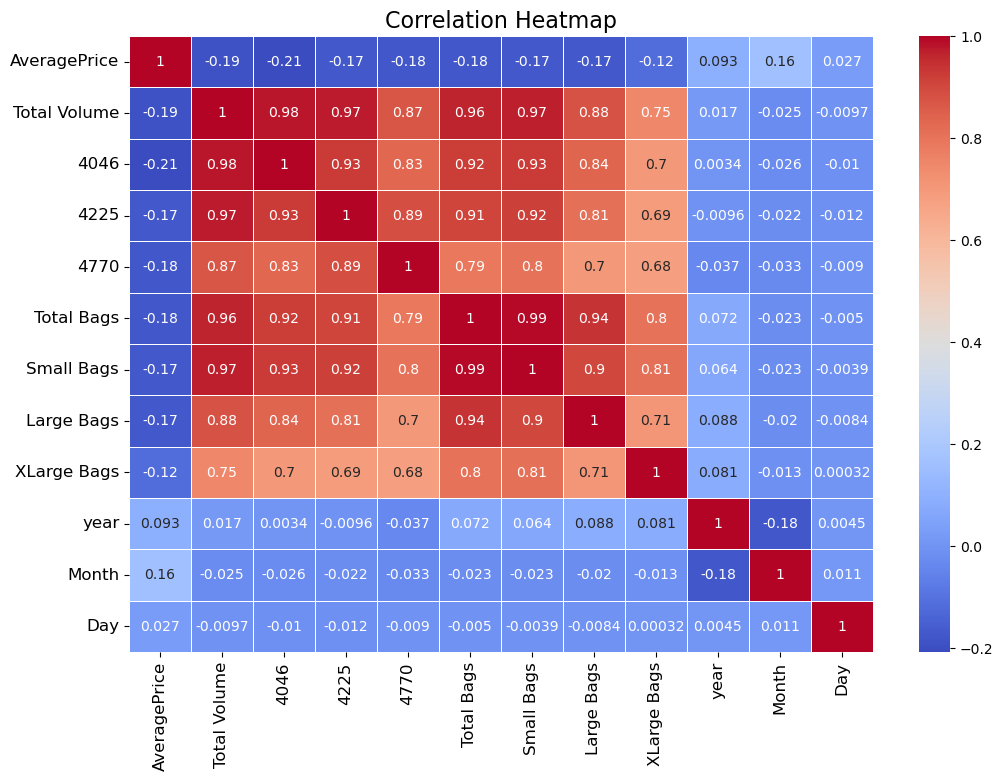

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [24]:
# Calculate the correlation of "AveragePrice" with other columns and sort in descending order
corr_with_average_price = df.corr()['AveragePrice'].sort_values(ascending=False)

# Display the sorted correlations
print(corr_with_average_price)


AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


# outcome
The correlation of the "AveragePrice" column with other columns is as follows:

-AveragePrice has a strong positive correlation with Month (0.162409).

-It also has a moderate positive correlation with year (0.093197).

-XLarge Bags has a negative correlation with AveragePrice (-0.117592).

-Columns like 4225, Large Bags, Small Bags, Total Bags, 4770, Total Volume, and 4046 have stronger negative correlations with -AveragePrice, with 4046 having the strongest negative correlation (-0.208317)

In [25]:

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'type' column
df['type'] = label_encoder.fit_transform(df['type'])

# Encode the 'region' column
df['region'] = label_encoder.fit_transform(df['region'])

df.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [26]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,1,7


In [27]:
# data types of the columns again
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

here categorical converted to numeric value.

# To check presence of outliers

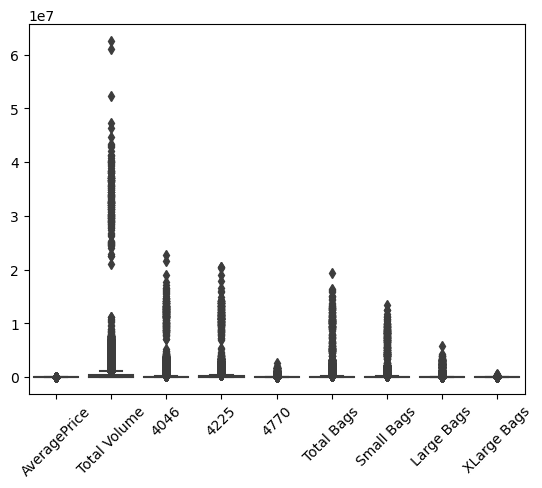

In [28]:


# Create box plots for numeric columns
sns.boxplot(data=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
plt.xticks(rotation=45)
plt.show()


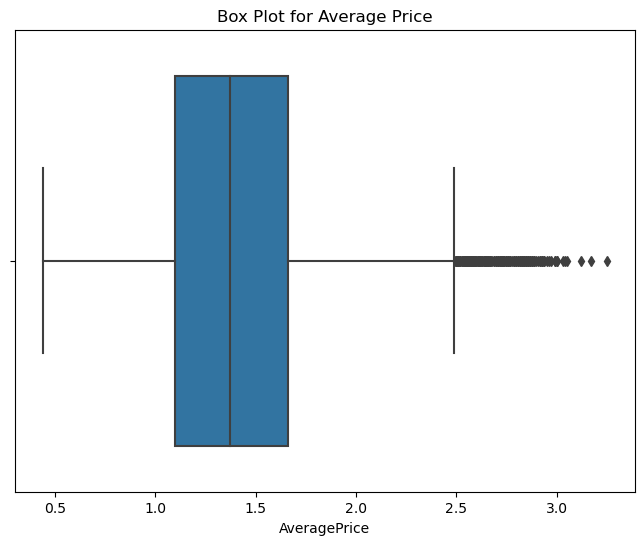

In [29]:
# Create a box plot for 'AveragePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AveragePrice'])
plt.title("Box Plot for Average Price")
plt.show()

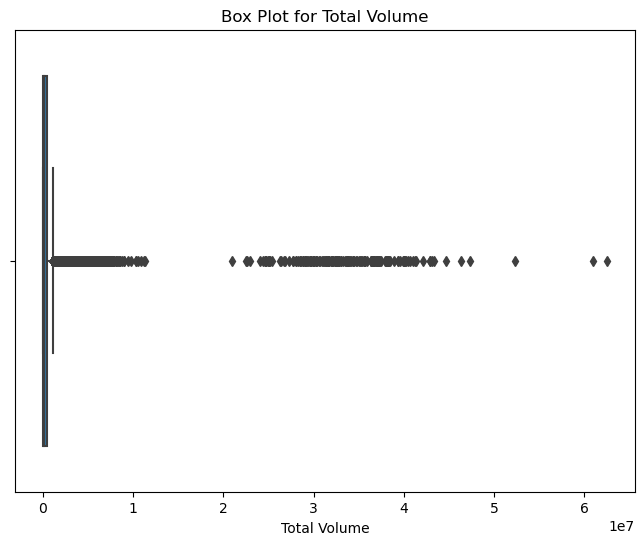

In [30]:
# Create a box plot for 'Total Volume'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Volume'])
plt.title("Box Plot for Total Volume")
plt.show()

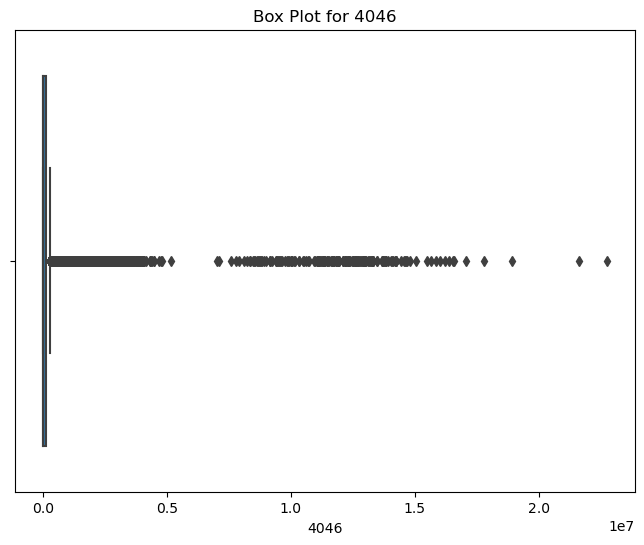

In [31]:
# Create a box plot for '4046'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['4046'])
plt.title("Box Plot for 4046")
plt.show()

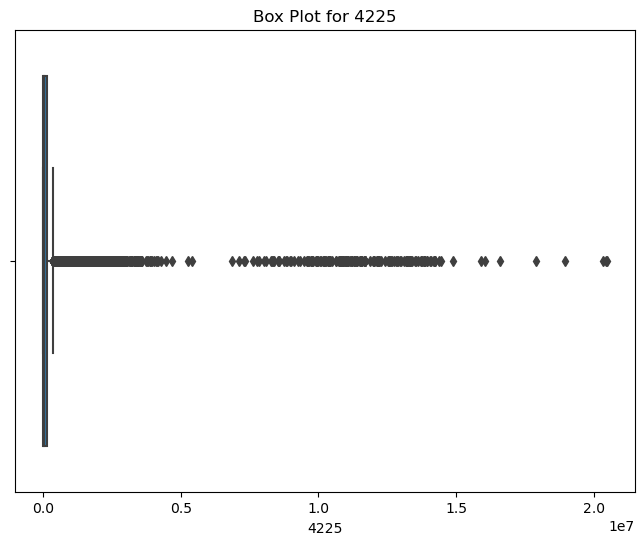

In [32]:
# Create a box plot for '4225'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['4225'])
plt.title("Box Plot for 4225")
plt.show()

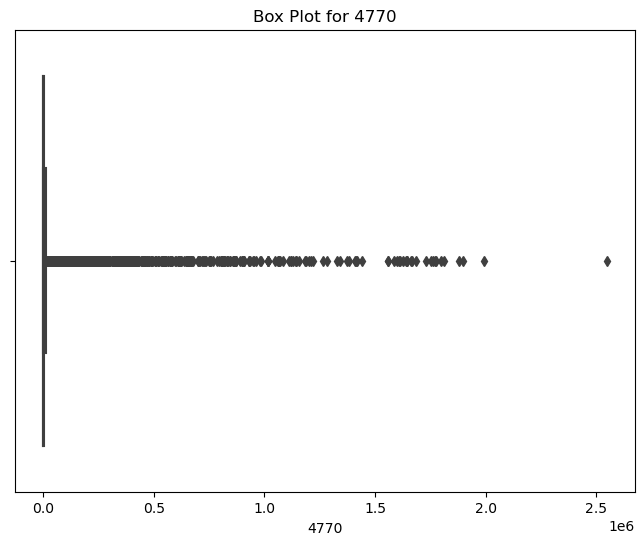

In [33]:
# Create a box plot for '4770'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['4770'])
plt.title("Box Plot for 4770")
plt.show()

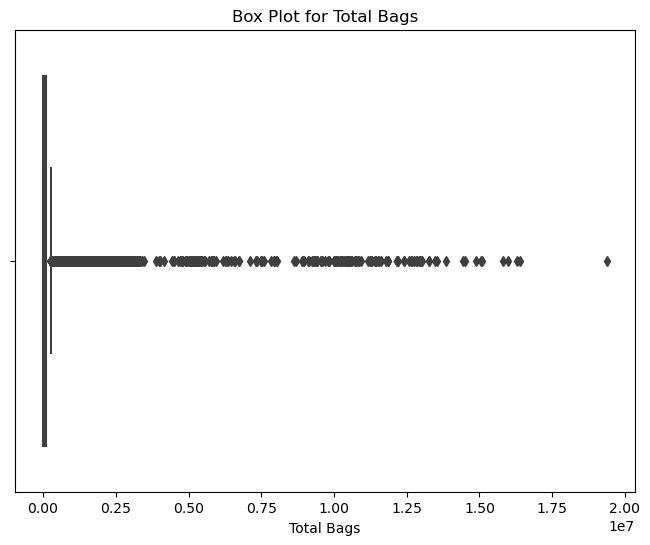

In [34]:
# Create a box plot for 'Total Bags'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Bags'])
plt.title("Box Plot for Total Bags")
plt.show()

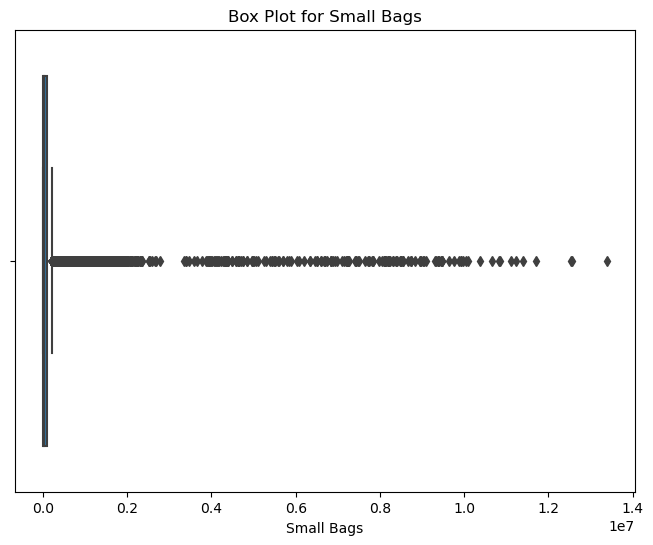

In [35]:
# Create a box plot for 'small Bags'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Small Bags'])
plt.title("Box Plot for Small Bags")
plt.show()

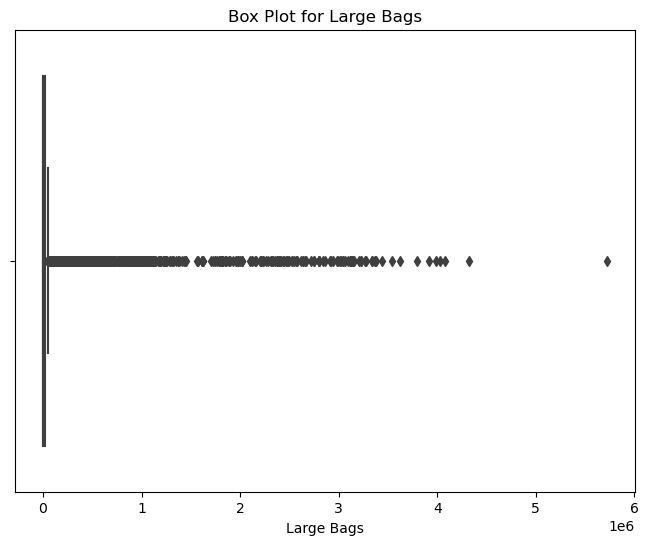

In [36]:
# Create a box plot for 'Large Bags'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Large Bags'])
plt.title("Box Plot for Large Bags")
plt.show()

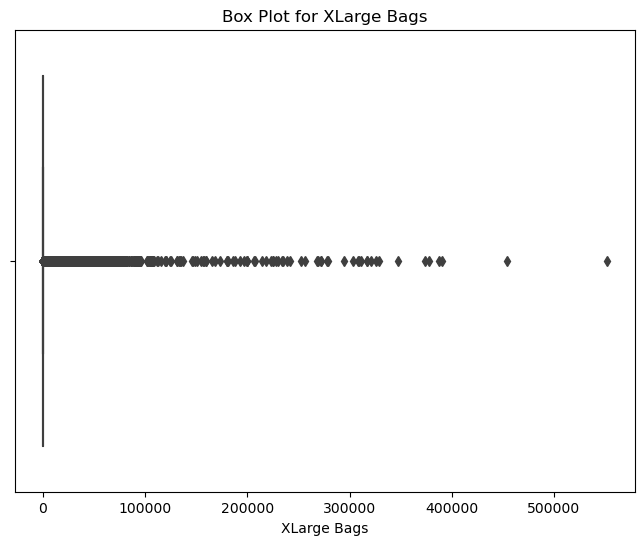

In [37]:
# Create a box plot for 'XLarge Bags'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['XLarge Bags'])
plt.title("Box Plot for XLarge Bags")
plt.show()

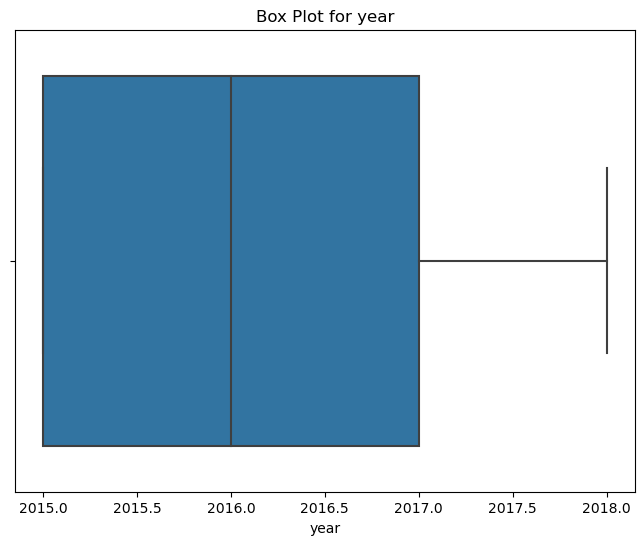

In [38]:
# Create a box plot for 'year'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['year'])
plt.title("Box Plot for year")
plt.show()

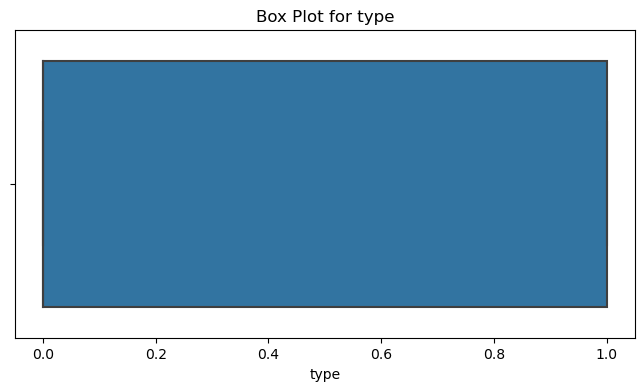

In [39]:
# Create a box plot for 'type'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['type'])
plt.title("Box Plot for type")
plt.show()


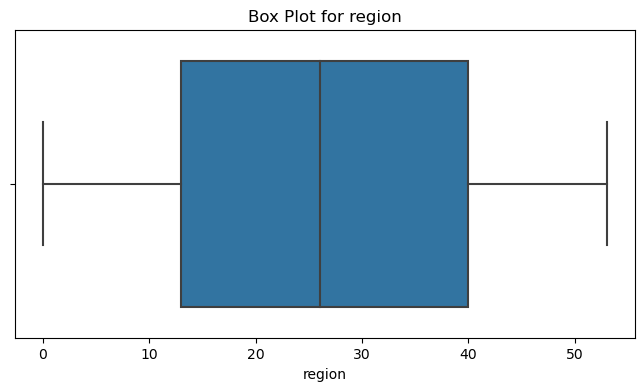

In [40]:
# Create a box plot for 'region'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['region'])
plt.title("Box Plot for region")
plt.show()

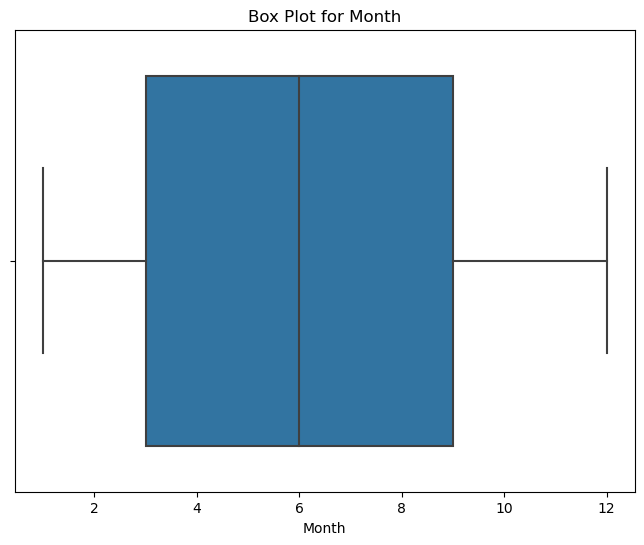

In [41]:
# Create a box plot for 'Month'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Month'])
plt.title("Box Plot for Month")
plt.show()

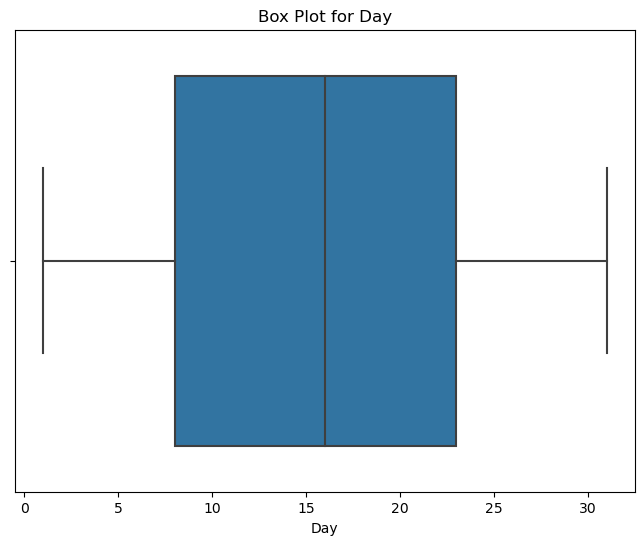

In [42]:
# Create a box plot for 'Day'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Day'])
plt.title("Box Plot for Day")
plt.show()

Columns 'type', 'Year', 'region', 'Month', and 'Day' do not contain outliers.


AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags have outliers present.



# Check skewness presence

In [43]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

# outcome
The columns with the highest skewness values are:

XLarge Bags: 13.139751
    
4770: 10.159396
    
Total Bags: 9.756072
    
Small Bags: 9.540660
    
4225: 8.942466
    
Total Volume: 9.007687
    
4046: 8.648220

# Clean the Data

Z-score technique

In [44]:
z = np.abs(zscore(df))
z.shape

(18249, 14)

In [45]:
thershold = 3
print(np.where (z>3))
# Assigning the values to df_new which are less of thershold value and removing the outliers
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

print ('Shape after removing the outliers is ', df_new.shape)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))
(18249, 14)
(17651, 14)
Shape after removing the outliers is  (17651, 14)


In [46]:
loss_per = ((18249-17651)/18249)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.276891884486821


# project part 1: label is 'AveragePrice'

# Dividing the dataset in Features and Vector

In [47]:
X= df_new.drop(['AveragePrice'], axis = 1)
y = df_new['AveragePrice']

In [48]:
from sklearn.preprocessing import power_transform
X = power_transform(X)
X

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

# Model Training

# LinearRegression

In [50]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared (R2) Score: 0.57


# KNeighborsRegressor

In [51]:
 # Create a K-Nearest Neighbors Regression model
k = 5  
model = KNeighborsRegressor(n_neighbors=k)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared (R2) Score: 0.80


# RandomForestRegressor

In [52]:
 #Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
R-squared (R2) Score: 0.89


# DecisionTreeRegressor

In [53]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)  

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
R-squared (R2) Score: 0.75


The R-squared score of approximately 0.89 indicates that  model explains a significant portion of the variance in the target variable.

# Save the Model

In [55]:
# Create a dictionary to store your results
results = {
    'y_test': y_test,
    'y_pred': y_pred
}

# Save the results to a file
with open('avocado_regression_results.pkl', 'wb') as file:
    pickle.dump(results, file)

In [59]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results_df.to_csv('avocado_regression_results.csv', index=False)

In [60]:
results_df

,Original,Predicted
3596,1.36,1.41
7141,1.70,1.76
4625,1.22,1.17
5456,0.81,0.89
10969,1.85,1.93
...,...,...
14775,1.79,2.04
2224,1.19,1.23
10030,2.31,2.25
5360,1.55,1.49


This table provides a side-by-side comparison of the actual prices (in the "Actual" column) and the prices predicted by our model (in the "Predicted" column).

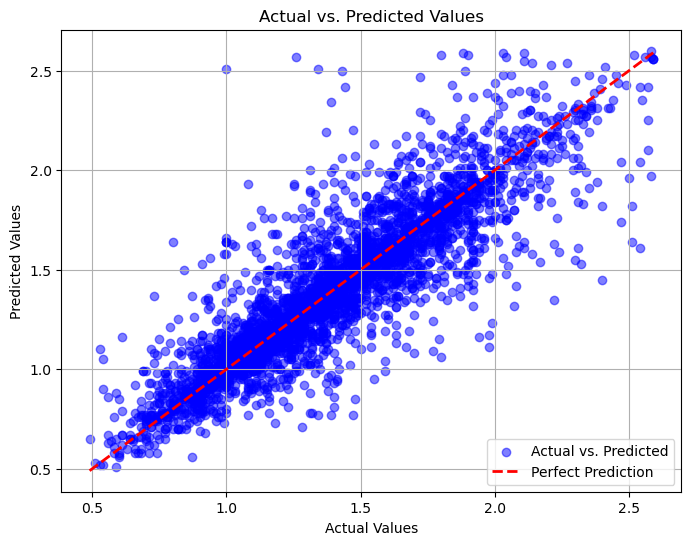

In [62]:
# Assuming we have loaded 'y_test' and 'y_pred' from your saved results
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


# project part 2: label is 'region'

# Dividing the dataset in Features and Vector

In [63]:
X= df_new.drop(['region'], axis = 1)
y = df_new['region']

In [64]:
from sklearn.preprocessing import power_transform
X = power_transform(X)
X

array([[-0.11782446, -0.07532391, -0.65742071, ..., -1.2106467 ,
         1.49138301,  1.22756521],
       [-0.06432986, -0.14749743, -0.77717852, ..., -1.2106467 ,
         1.49138301,  0.53822879],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -1.2106467 ,
         1.49138301, -0.21895878],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  1.97870686,
        -1.64028838,  0.64019459],
       [ 1.31329624, -0.70179733, -0.54701087, ...,  1.97870686,
        -1.64028838, -0.10529902],
       [ 0.61561867, -0.66738095, -0.35967077, ...,  1.97870686,
        -1.64028838, -0.9581001 ]])

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.11782446, -0.07532391, -0.65742071, ..., -1.21061818,
         1.49138301,  1.22756521],
       [-0.06432986, -0.14749743, -0.77717852, ..., -1.21061818,
         1.49138301,  0.53822879],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -1.21061818,
         1.49138301, -0.21895878],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  1.97873539,
        -1.64028838,  0.64019459],
       [ 1.31329624, -0.70179733, -0.54701087, ...,  1.97873539,
        -1.64028838, -0.10529902],
       [ 0.61561867, -0.66738095, -0.35967077, ...,  1.97873539,
        -1.64028838, -0.9581001 ]])

# DecisionTreeClassifier

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        68
           1       0.76      0.77      0.76        69
           2       0.92      0.88      0.90        64
           3       0.86      0.89      0.87        62
           4       0.89      0.91      0.90        69
           5       0.67      0.81      0.73        72
           6       0.93      0.89      0.91        56
           7       0.88      0.78      0.83        78
           8       0.86      0.94      0.90        54
           9       0.79      0.70      0.74        76
          10       0.66      0.59      0.62        59
          11       0.87      0.87      0.87        68
          12       0.85      0.84      0.84        68
          13       0.69      0.72      0.70        64
          14       0.92      0.76      0.83        72
          15       0.90      0.90      0.90        60
          16       0.91      0.91      0.

# RandomForestClassifier

In [67]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        68
           1       0.84      0.96      0.89        69
           2       0.93      1.00      0.96        64
           3       0.90      0.87      0.89        62
           4       0.94      0.99      0.96        69
           5       0.91      0.82      0.86        72
           6       0.96      0.95      0.95        56
           7       0.95      0.91      0.93        78
           8       0.96      0.98      0.97        54
           9       0.90      0.86      0.88        76
          10       0.83      0.85      0.84        59
          11       0.89      0.96      0.92        68
          12       0.96      0.94      0.95        68
          13       0.85      0.86      0.85        64
          14       0.96      0.89      0.92        72
          15       0.98      0.95      0.97        60
          16       0.99      0.95      0.

# KNeighborsClassifier

In [68]:
# Create a KNN Classifier 
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76        68
           1       0.37      0.59      0.46        69
           2       0.72      0.91      0.81        64
           3       0.66      0.73      0.69        62
           4       0.70      0.75      0.73        69
           5       0.65      0.58      0.61        72
           6       0.84      0.82      0.83        56
           7       0.65      0.79      0.71        78
           8       0.79      0.89      0.83        54
           9       0.55      0.62      0.58        76
          10       0.26      0.46      0.33        59
          11       0.58      0.87      0.69        68
          12       0.87      0.90      0.88        68
          13       0.49      0.55      0.51        64
          14       0.81      0.82      0.81        72
          15       0.78      0.88      0.83        60
          16       0.81      0.87      0.

After observation , Random Forest Classifier for the "region" classification task is performing very well. The accuracy is 0.91, and the classification report shows high precision, recall, and F1-scores for most classes.

# Save the Model

In [75]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
import pickle

# Save the best classifier model to a file
with open('region.clf.pkl', 'wb') as file:
    pickle.dump(clf, file)


In [76]:
#Assuming that predictions (y_pred) and actual target values (y_test) as NumPy arrays

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results_df.to_csv('region_classification_results.csv', index=False)


In [77]:
results_df

,Original,Predicted
3596,15,15
7141,28,28
4625,34,34
5456,50,24
10969,35,35
...,...,...
14775,0,0
2224,42,8
10030,17,40
5360,49,49


# Visualization

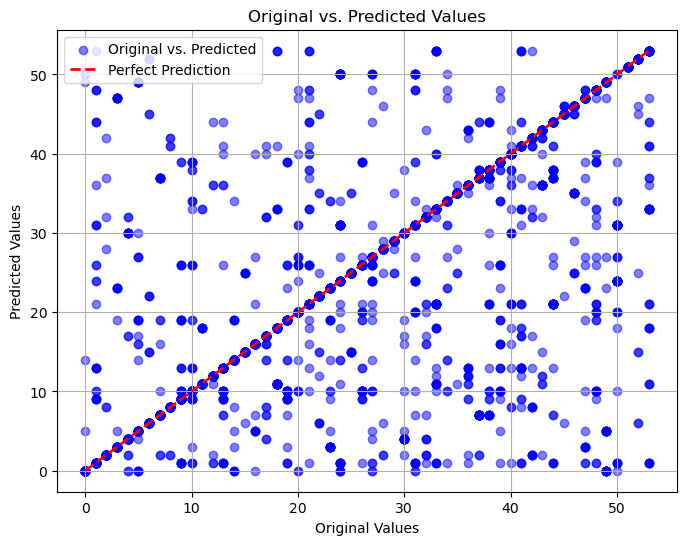

In [80]:
# Assuming we have loaded 'y_test' and 'y_pred' from your saved results
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Original vs. Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Original vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

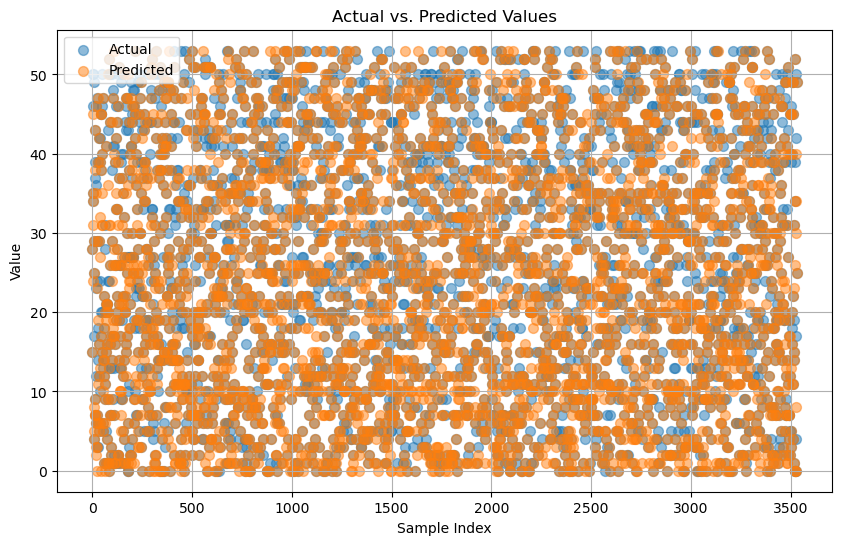

In [81]:
import matplotlib.pyplot as plt

# Assuming we have predictions (y_pred) and actual target values (y_test) as NumPy arrays
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', s=50,alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', s=50,alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
